In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline
%config Inline.Backend.figure_format = 'retina'

In [ ]:
# Loading a sample camera calibration_image
sample_calibration_image = mpimg.imread('./camera_cal/calibration10.jpg')
plt.imshow(sample_calibration_image)
plt.show()

### there are 9 corners x direction and 6 corners in y direction as we can see in image above

So the number of corners we need to detect for camera calibration is (9, 6)

In [ ]:
nx = 9
ny = 6

In [4]:
# Creating Obj Points and Image Points to find camera matrix and distortion matrix
obj_points = []
img_points = []

objp = np.zeros((nx*ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

In [5]:
# Function to detect corners in image
def find_chessboard_corners(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.findChessboardCorners(gray, (nx, ny), None)

In [6]:
fname_images = glob.glob('./camera_cal/calibration*.jpg')

In [7]:
# Function to detect chessboard corners in all the calibration images
for fname in fname_images:
    img = mpimg.imread(fname)
    ret, corners = find_chessboard_corners(img)
    if ret == True:
        img_points.append(corners)
        obj_points.append(objp)    

In [8]:
# Function to undistort a image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

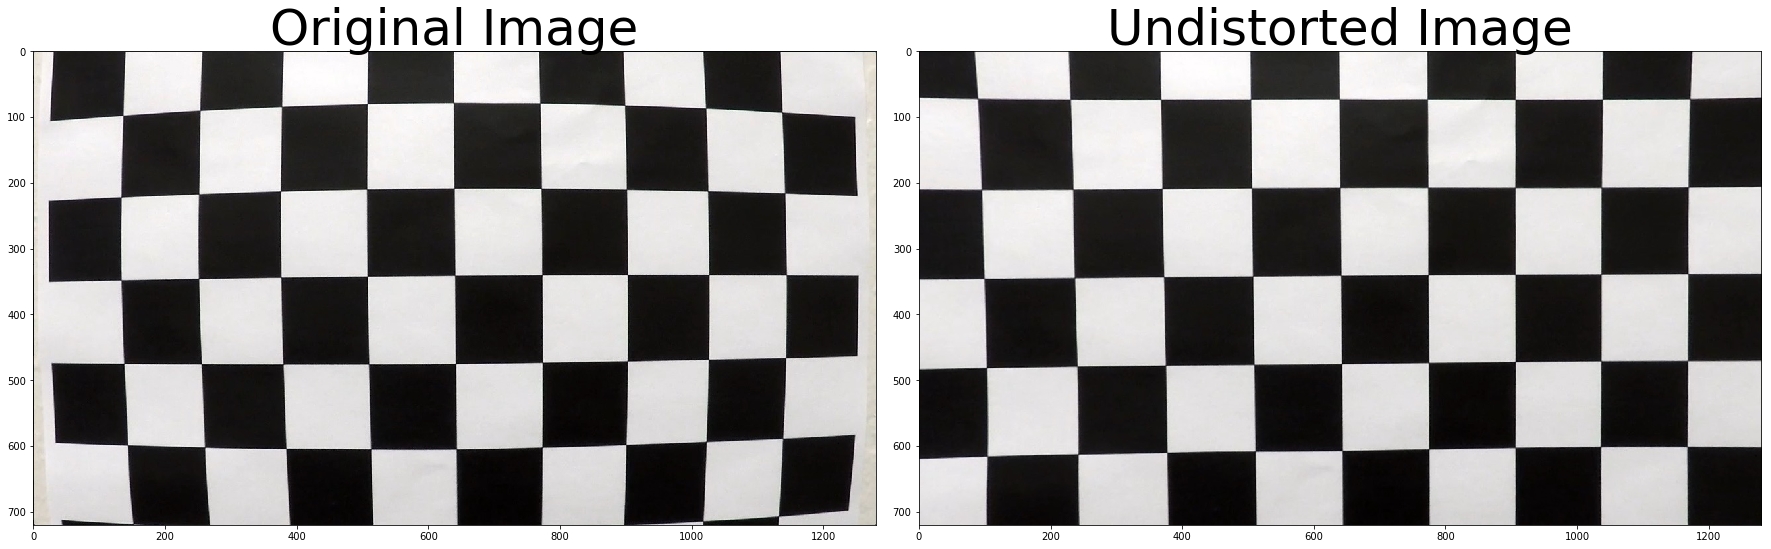

In [9]:
test_undistortion_image = mpimg.imread('test_undistortion.jpg')
test_undistorted_image = cal_undistort(test_undistortion_image, obj_points, img_points)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_undistortion_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(test_undistorted_image)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [10]:
# Function to calculate sobel gradient along direction and return a binary thresholded image
def abs_sobel_threshold(img, orient = 'x', thresh = (0, 255), ksize = 3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    direction = (1, 0) if orient == 'x' else (0, 1) 
    sobel = cv2.Sobel(gray, cv2.CV_64F, direction[0], direction[1], ksize = ksize)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*(abs_sobel/np.max(abs_sobel)))
    binary_sobel = np.zeros_like(scaled_sobel)
    binary_sobel[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_sobel

In [11]:
test_image = mpimg.imread('./test_images/test5.jpg')

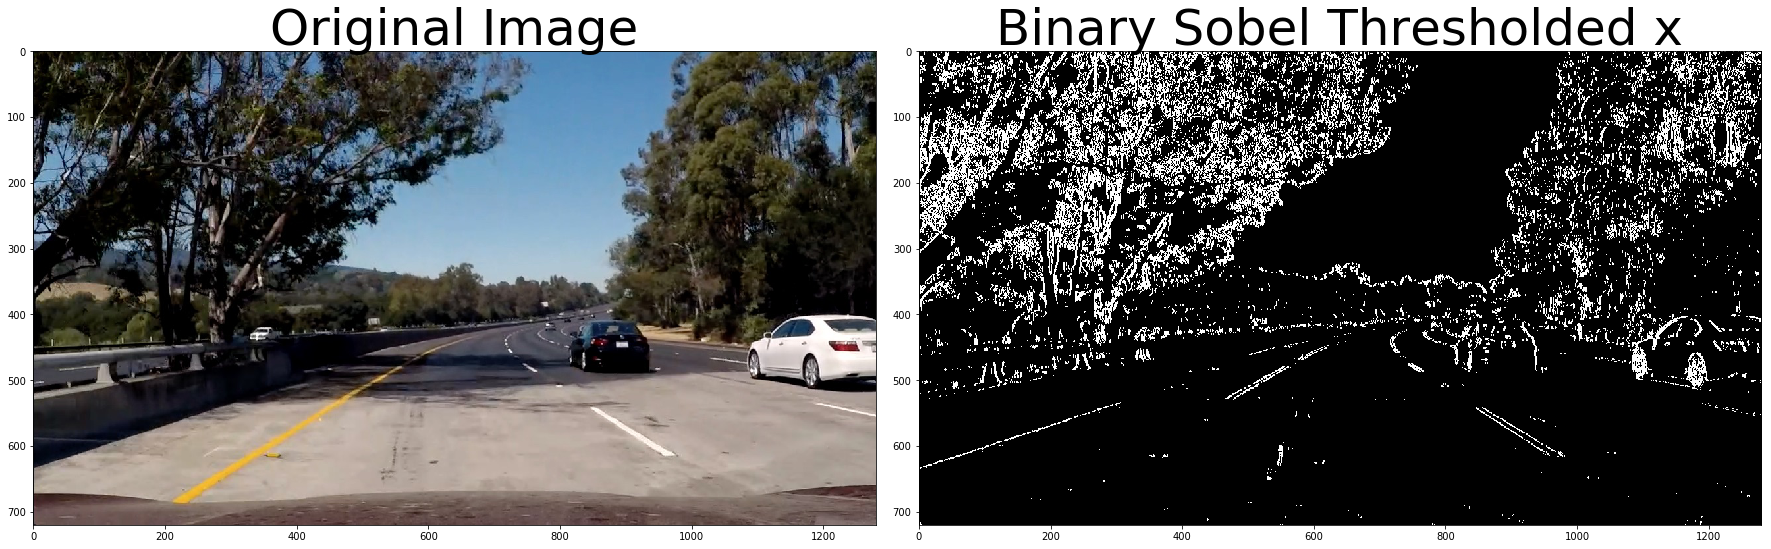

In [12]:
sobel_binary_x = abs_sobel_threshold(test_image, orient = 'x', thresh = (20, 200), ksize = 3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(sobel_binary_x, cmap = 'gray')
ax2.set_title('Binary Sobel Thresholded x', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

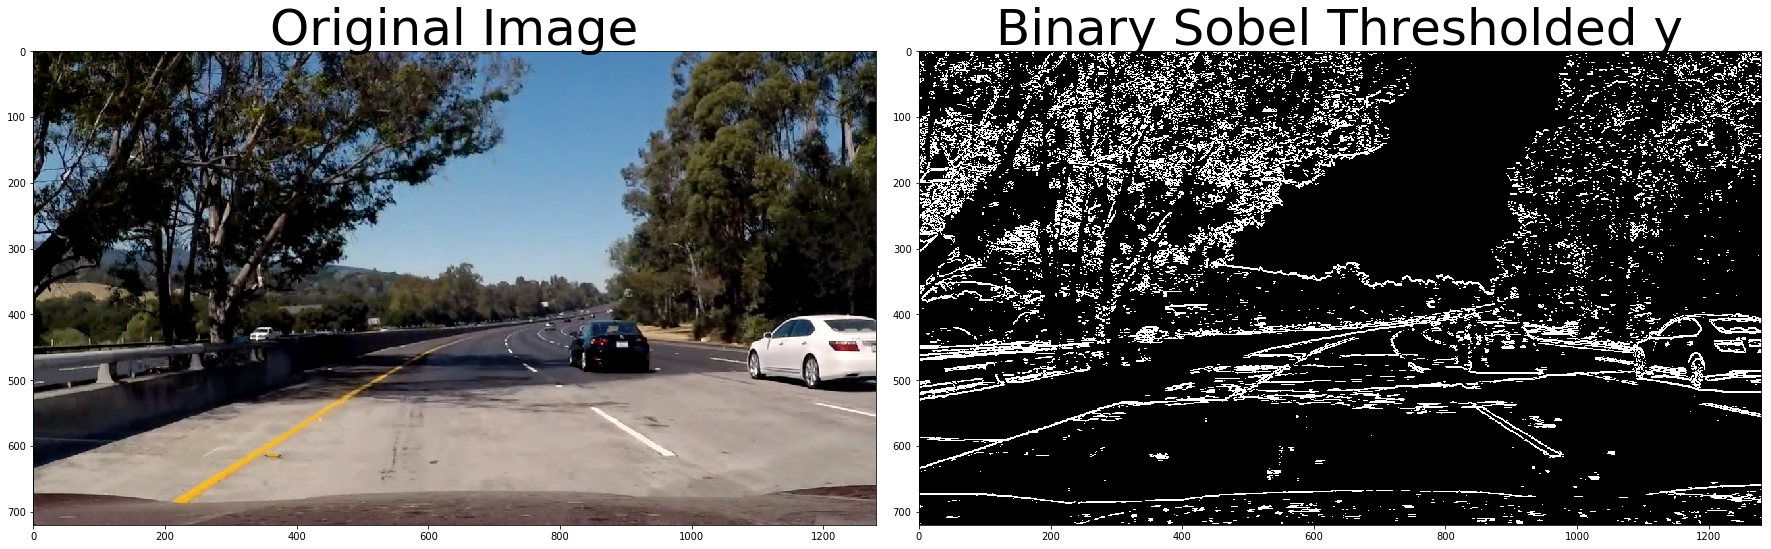

In [13]:
sobel_binary_y = abs_sobel_threshold(test_image, orient = 'y', thresh = (20, 200), ksize = 3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(sobel_binary_y, cmap = 'gray')
ax2.set_title('Binary Sobel Thresholded y', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [14]:
# Function to calculate magnitude of gradient across x, y and return a binary thresholded image
def mag_sobel_threshold(img, thresh = (0, 255), ksize = 3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = ksize)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = ksize)
    mag_sobel = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    scaled_sobel = np.uint8(255*(mag_sobel/np.max(mag_sobel)))
    binary_mag_sobel = np.zeros_like(scaled_sobel)
    binary_mag_sobel[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_mag_sobel

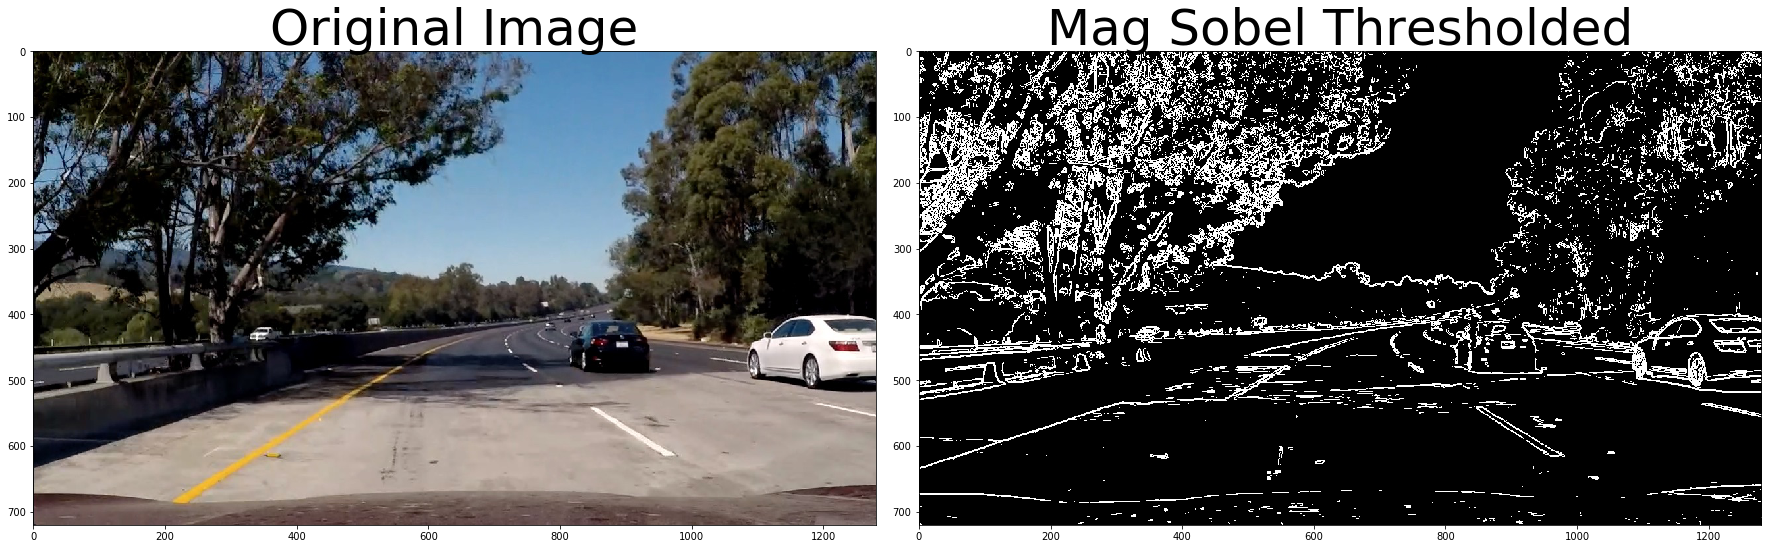

In [15]:
mag_sobel = mag_sobel_threshold(test_image, thresh = (30, 200), ksize = 3)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(mag_sobel, cmap='gray')
ax2.set_title('Mag Sobel Thresholded', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [16]:
# Function to calculate direction of gradient across x, y and return a binary thresholded image
def dir_sobel_threshold(img, thresh = (0, np.pi/2), ksize = 3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = ksize)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = ksize)
    dir_sobel = np.arctan2(np.absolute(sobel_y), np.absolute(sobel_x))
    binary_dir_sobel = np.zeros_like(dir_sobel)
    binary_dir_sobel[(dir_sobel >= thresh[0]) & (dir_sobel <= thresh[1])] = 1
    return binary_dir_sobel

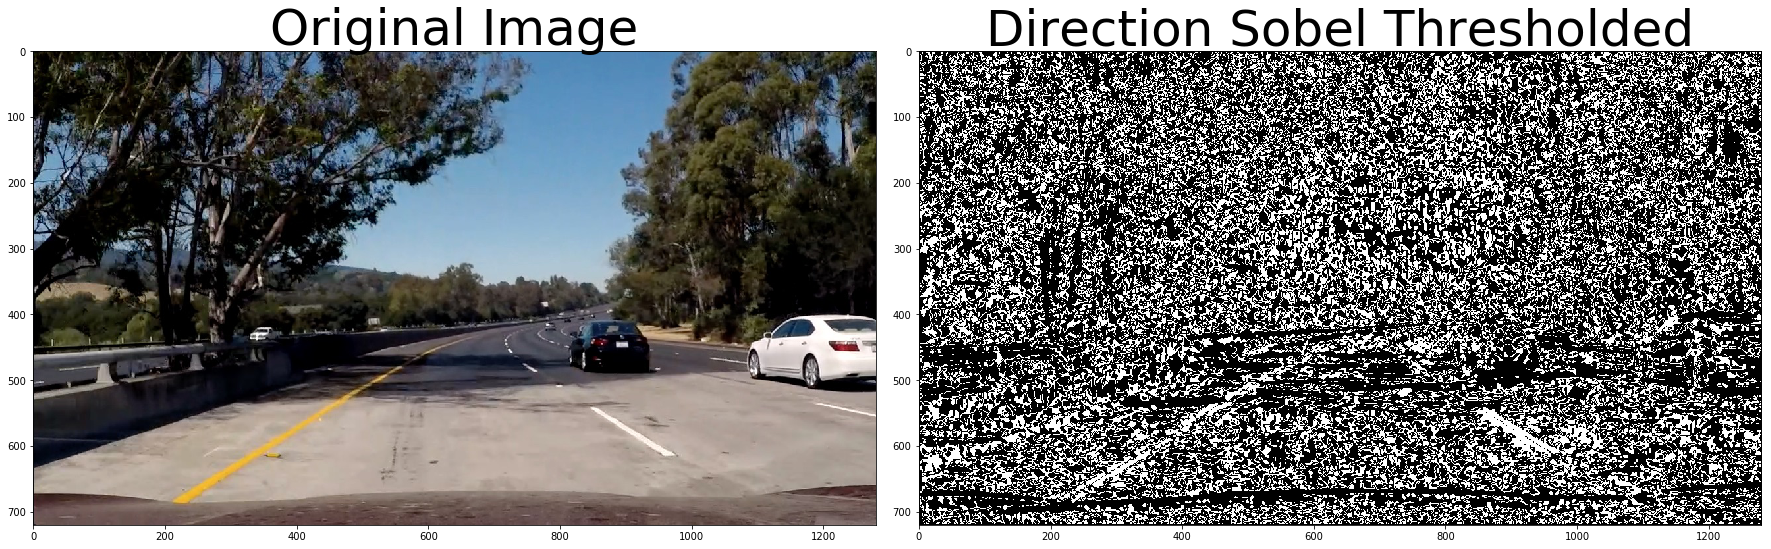

In [17]:
dir_sobel = dir_sobel_threshold(test_image, thresh = (0.7, 1.3), ksize = 15)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(dir_sobel, cmap='gray')
ax2.set_title('Direction Sobel Thresholded', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [18]:
# Function to return Saturation thresholded image
def s_thresholded(img, thresh = (0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s = hls[:,:,2]
    binary_s = np.zeros_like(s)
    binary_s[(s >= thresh[0]) & (s <= thresh[1])] = 1
    return binary_s

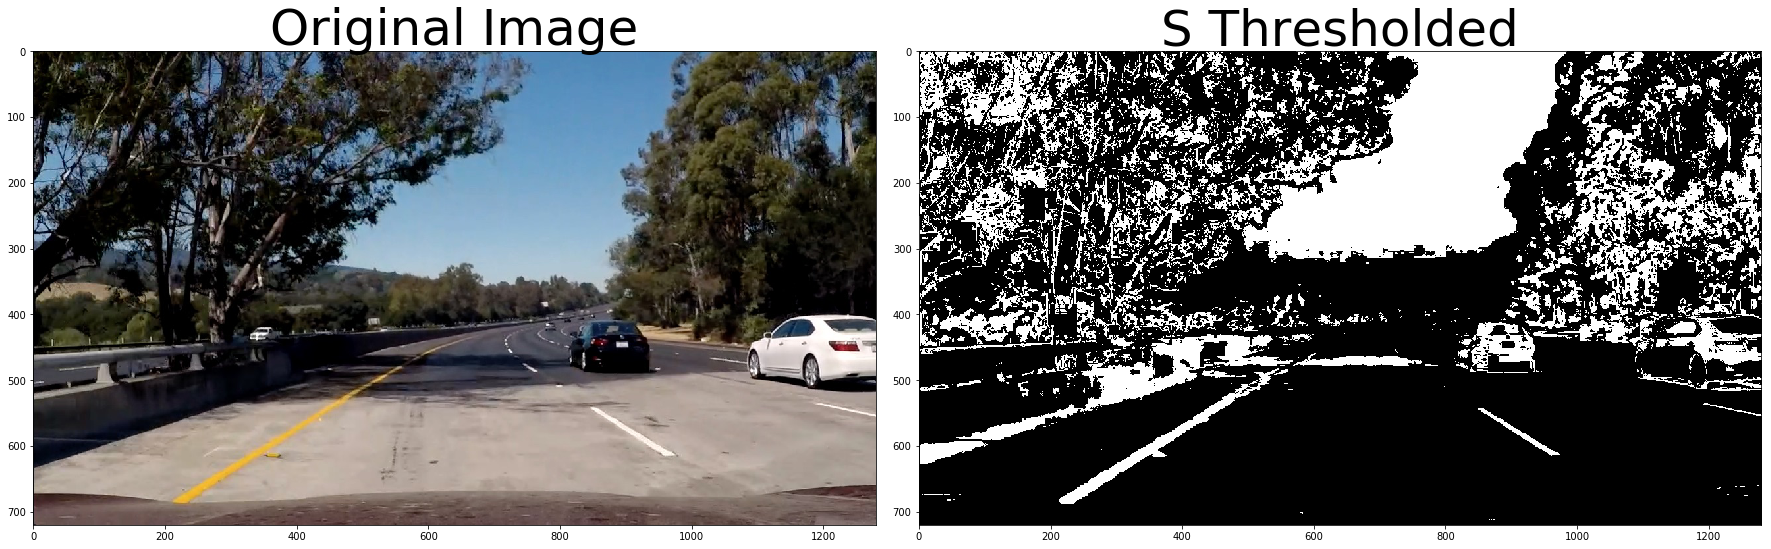

In [19]:
s_thresholded_img = s_thresholded(test_image, thresh = (90, 255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(s_thresholded_img, cmap='gray')
ax2.set_title('S Thresholded', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
# Function to return L thresholded image
def l_thresholded(img, thresh = (0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l = hls[:,:,1]
    binary_l = np.zeros_like(l)
    binary_l[(l >= thresh[0]) & (l <= thresh[1])] = 1
    return binary_l

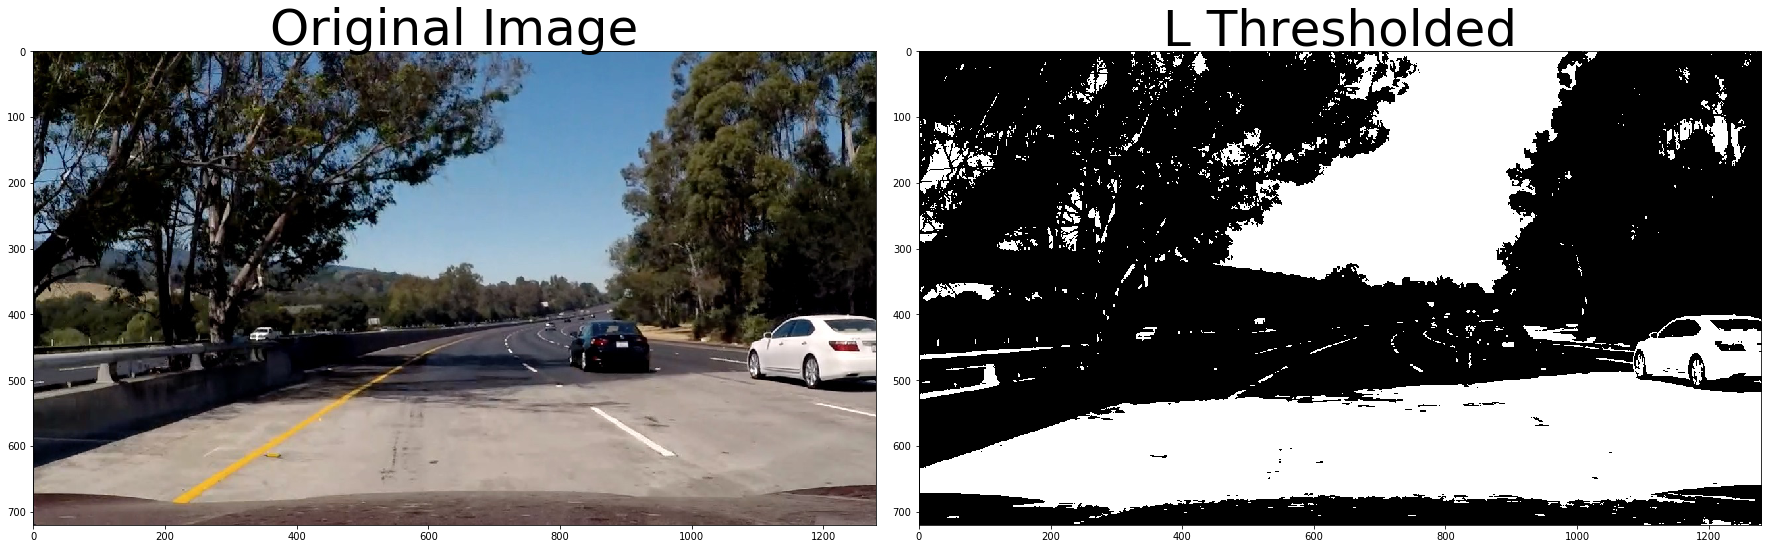

In [21]:
l_thresholded_img = l_thresholded(test_image, thresh = (120, 255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(l_thresholded_img, cmap='gray')
ax2.set_title('L Thresholded', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [22]:
# Function to return R thresholded image
def r_thresholded(img, thresh = (0, 255)):
    r = img[:,:,0]
    binary_r = np.zeros_like(r)
    binary_r[(r >= thresh[0]) & (r <= thresh[1])] = 1
    return binary_r

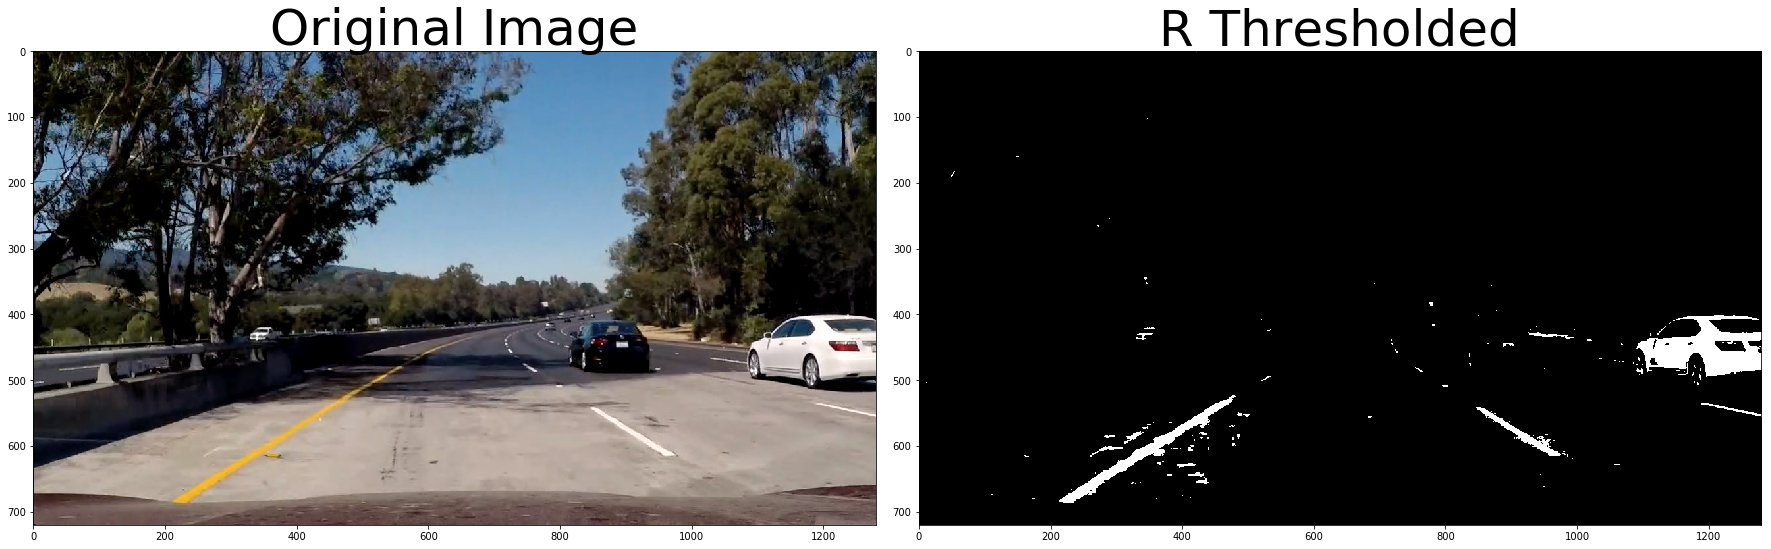

In [23]:
r_thresholded_img = r_thresholded(test_image, thresh = (200, 255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(r_thresholded_img, cmap='gray')
ax2.set_title('R Thresholded', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [24]:
# Creating a image combined, undistortion, gradient, s and r threshold
def combined_binary(img):
    undistorted_img = cal_undistort(img, obj_points, img_points)
    
    sobel_binary_x = abs_sobel_threshold(undistorted_img, orient = 'x', thresh = (20, 200), ksize = 3)
    sobel_binary_y = abs_sobel_threshold(undistorted_img, orient = 'y', thresh = (20, 200), ksize = 3)
    mag_sobel = mag_sobel_threshold(undistorted_img, thresh = (30, 200), ksize = 3)
    dir_sobel = dir_sobel_threshold(undistorted_img, thresh = (0.7, 1.3), ksize = 15)
    s_thresholded_img = s_thresholded(undistorted_img, thresh = (90, 255))
    r_thresholded_img = r_thresholded(undistorted_img, thresh = (200, 255))
    l_thresholded_img = l_thresholded(test_image, thresh = (120, 255))
    
    binary_combined = np.zeros_like(sobel_binary_x)
    binary_combined[((sobel_binary_x == 1) & (dir_sobel == 1)) | ((s_thresholded_img == 1) & (r_thresholded_img == 1) & l_thresholded_img == 1)] = 1
    return binary_combined

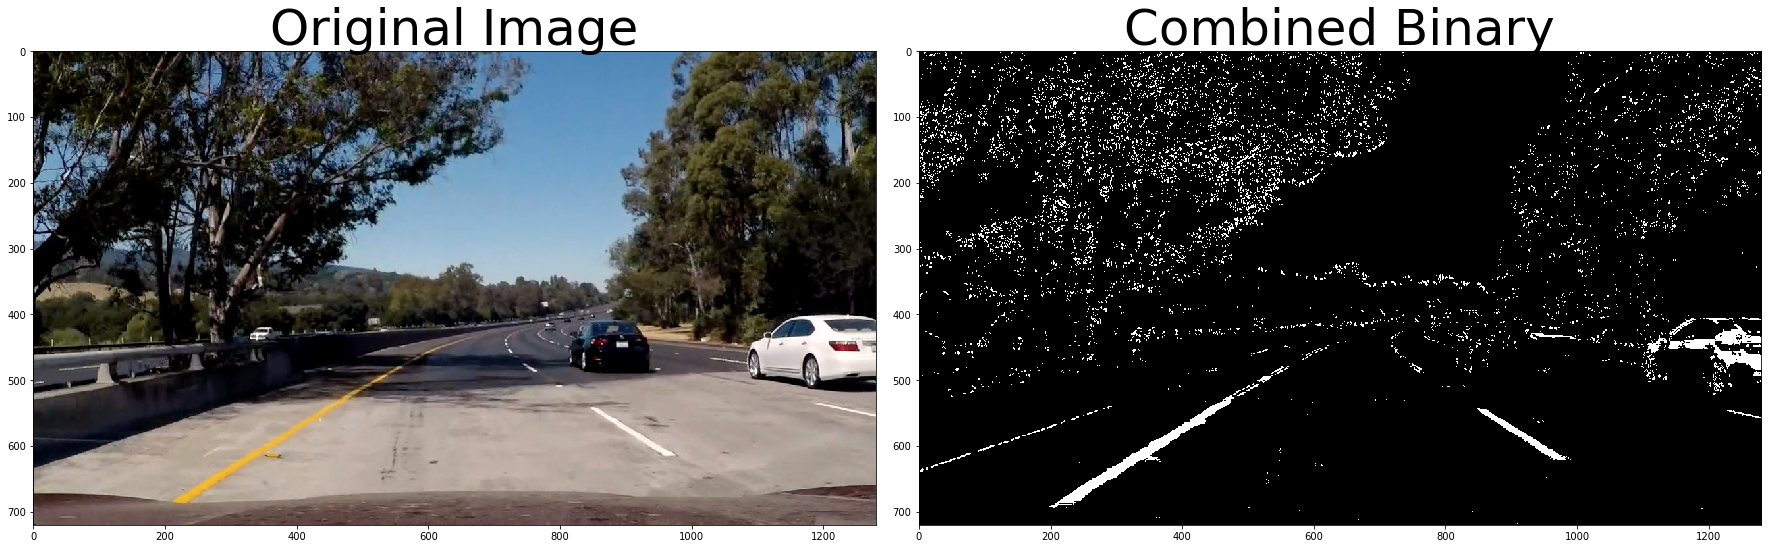

In [25]:
combined_binary_img = combined_binary(test_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(combined_binary_img, cmap='gray')
ax2.set_title('Combined Binary', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280, 3)


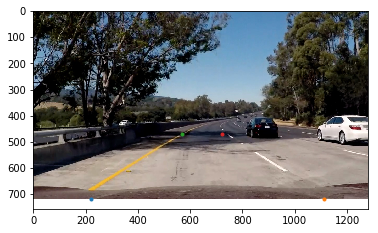

In [26]:
# Loading a image with straight lanes to get source points for perspective transform
plt.imshow(test_image)
print(test_image.shape)
plt.plot(220, 720, '.')
plt.plot(1110, 720, '.')
plt.plot(570, 470, '.')
plt.plot(720, 470, '.')

plt.show()

In [27]:
# Function to perform perspective transform and return birds eye view of road.
def perspective_transform(img):
    src = np.float32(
        [[220, 720], 
         [1110, 720], 
         [570, 470], 
         [720, 470]])
    
    dst = np.float32(
        [[320, 720], 
         [920, 720], 
         [320, 1], 
         [920, 1]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, Minv

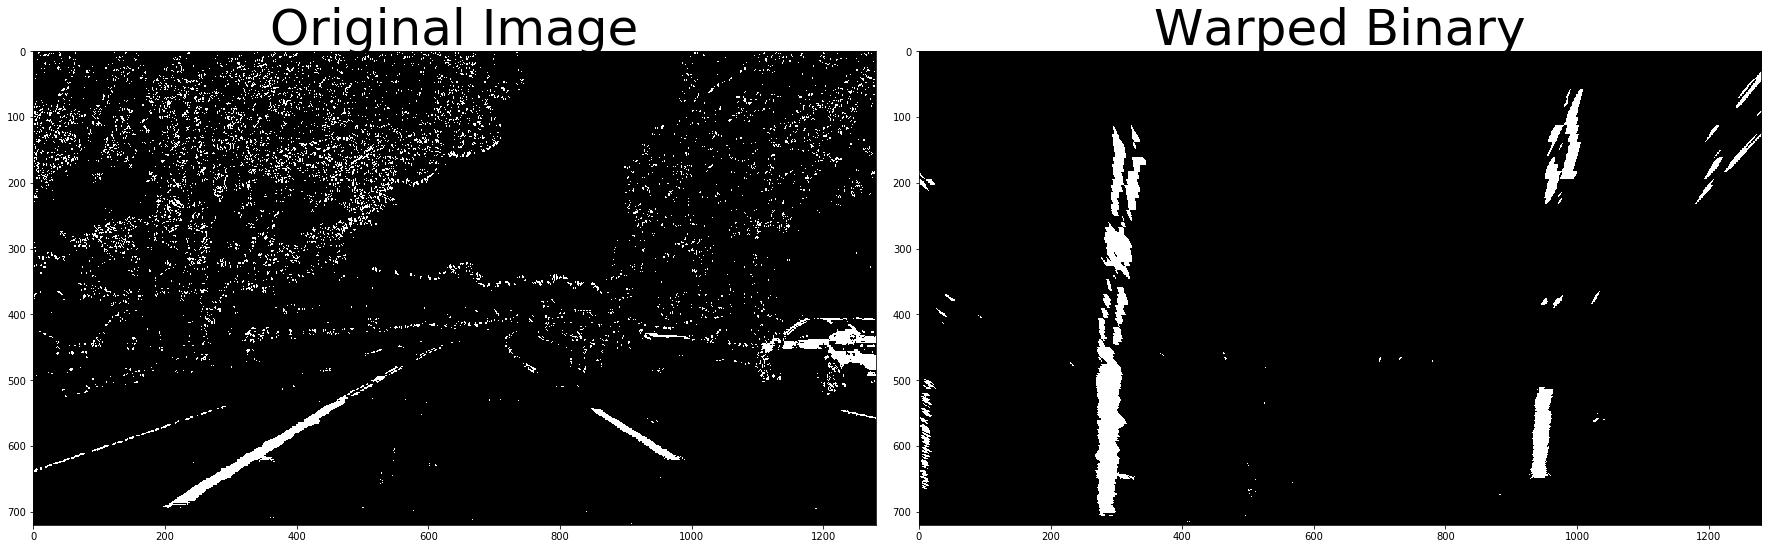

In [28]:
warped_img, Minv = perspective_transform(combined_binary_img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(combined_binary_img, cmap='gray')
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(warped_img, cmap='gray')
ax2.set_title('Warped Binary', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

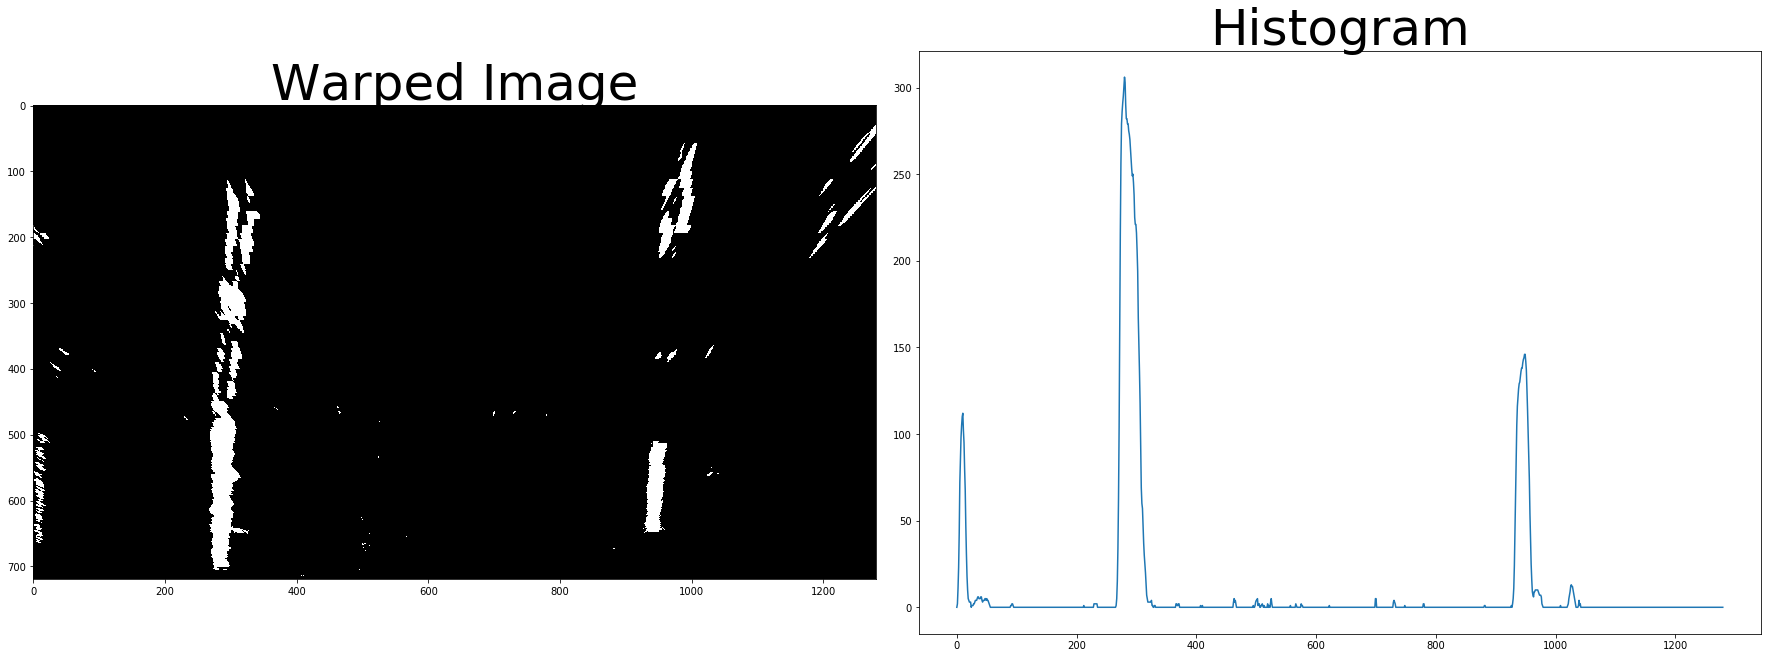

In [29]:
histogram = np.sum(warped_img[warped_img.shape[0]//2:,:], axis=0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 9))
f.tight_layout()
ax1.imshow(warped_img, cmap='gray')
ax1.set_title('Warped Image', fontsize = 50)
ax2.plot(histogram)
ax2.set_title('Histogram', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

As we can see from above histogram that there are two peak points. These two peak points correspond to the position where lane lines are.

In [30]:
# function to visualize lane markings in warped image
def visualize_lane_marking(binary_warped, ploty, left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, margin):
    img_size = binary_warped.shape
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()

In [31]:
def sliding_window_search(binary_warped, isTest = False):
    img_size = binary_warped.shape
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 100
    minpix = 50
    left_lane_inds = []
    right_lane_inds = []
    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    y_eval = np.max(ploty)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700
    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    if isTest == True:
        visualize_lane_marking(binary_warped, ploty, left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, margin)
    return left_fit, right_fit, left_curverad, right_curverad, ploty, left_fitx, right_fitx

In [32]:
def continue_search_from_previous(binary_warped, left_fit, right_fit, isTest = False):
    img_size = binary_warped.shape
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    y_eval = np.max(ploty)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700
    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    if isTest == True:
        visualize_lane_marking(binary_warped, ploty, left_fit, right_fit, left_lane_inds, right_lane_inds, nonzerox, nonzeroy, margin)
    return left_fit, right_fit, left_curverad, right_curverad, ploty, left_fitx, right_fitx

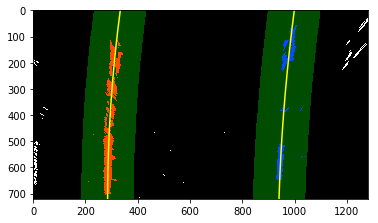

In [33]:
left_fit, right_fit, left_curverad, right_curverad, ploty, left_fitx, right_fitx = sliding_window_search(warped_img, isTest = True)

In [34]:
def visualizer_lane_on_original_image(original_img, warped_img, Minv, ploty, left_fitx, right_fitx):
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    newwarp = cv2.warpPerspective(color_warp, Minv, (warped_img.shape[1], warped_img.shape[0]))
    result = cv2.addWeighted(original_img, 1, newwarp, 0.3, 0)
    return result

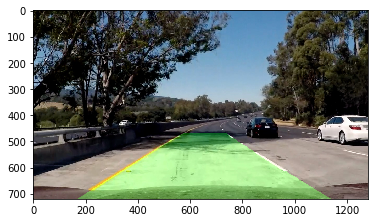

In [35]:
result = visualizer_lane_on_original_image(test_image, warped_img, Minv, ploty, left_fitx, right_fitx)
plt.imshow(result)

In [36]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [37]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
    
    def add_fit(self, fit):
        self.detected = True
        self.best_fit = fit
            

In [38]:
def process_frame(frame):
    combined_binary_img = combined_binary(frame)
    warped_img, Minv = perspective_transform(combined_binary_img)
    if l_line.detected == False or r_line.detected == False:
        left_fit, right_fit, left_curverad, right_curverad, ploty, left_fitx, right_fitx = \
            sliding_window_search(warped_img)
    else:
        left_fit, right_fit, left_curverad, right_curverad, ploty, left_fitx, right_fitx = \
            continue_search_from_previous(warped_img, l_line.best_fit, r_line.best_fit)
    
    l_line.add_fit(left_fit)
    r_line.add_fit(right_fit)
    result = visualizer_lane_on_original_image(frame, warped_img, Minv, ploty, left_fitx, right_fitx)
    return result

In [ ]:
l_line = Line()
r_line = Line()

output_project_video = 'output_videos/project_video.mp4'
project_video_clip = VideoFileClip("project_video.mp4")
output_clip = project_video_clip.fl_image(process_frame)
%time output_clip.write_videofile(output_project_video, audio=False)

In [ ]:

HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(output_project_video))

In [39]:
l_line = Line()
r_line = Line()

output_challenge_video = 'output_videos/challenge_video.mp4'
challenge_video_clip = VideoFileClip("challenge_video.mp4")
output_clip = challenge_video_clip.fl_image(process_frame)
%time output_clip.write_videofile(output_challenge_video, audio=False)

[MoviePy] >>>> Building video output_videos/challenge_video.mp4
[MoviePy] Writing video output_videos/challenge_video.mp4


100%|██████████| 485/485 [07:25<00:00,  1.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/challenge_video.mp4 

CPU times: user 7min 26s, sys: 22.7 s, total: 7min 49s
Wall time: 7min 26s


In [40]:

HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(output_challenge_video))